<a href="https://colab.research.google.com/github/ChangFuchun/Titanic/blob/main/Kaggle_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from urllib.request import urlretrieve
url = "https://github.com/ChangFuchun/Titanic/raw/main/titanic/train.csv"
urlretrieve(url, "train_csv")
url = "https://github.com/ChangFuchun/Titanic/raw/main/titanic/test.csv"
urlretrieve(url, "test_csv")

('test_csv', <http.client.HTTPMessage at 0x7f4ce3d66590>)

In [2]:
import pandas as pd
datas = pd.read_csv("train_csv", encoding="utf-8")
datas_predit = pd.read_csv("test_csv", encoding="utf-8")


In [3]:
datas_predit

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
#填補缺失值
#ignore_index=True 重製標籤
#參數axis=1 橫向 axis=0 直向
#drop
datas_total = pd.concat([datas, datas_predit])
datas_total = datas_total.drop(["PassengerId", "Survived"], axis=1)
datas_total

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


填補空值

a. 類別型:Plcass, Name(mid), Sex, Cabin(First), Embarked

b. 數值型:Age, Sibsp, parch, Ticket, Fare

補最可能的

a. 類別值:最常出現的

b. 數值型:中位數值

In [5]:
#pd.isna() 檢查是不是空的
#將值加總
s = datas_total.isna().sum()
#s>0 都有資料=True filter後留下有空缺的部分
#ascending=True 小到大
s[s > 0].sort_values(ascending=True)

Fare           1
Embarked       2
Age          263
Cabin       1014
dtype: int64

In [6]:
#填入中位數(找出最多的)
#.value_counts()列出總共幾個
#.idxmax()直接找到最多的
v = datas_total["Embarked"].value_counts().idxmax()
#.fillna(v)直接填入最多的值
datas_total["Embarked"] = datas_total["Embarked"].fillna(v)
s = datas_total.isna().sum()
s[s > 0].sort_values(ascending=False)

Cabin    1014
Age       263
Fare        1
dtype: int64

In [7]:
#.median()為計算出中位數，會自動依照數字去做計算
#.drop("Pclass")丟棄非數值型的欄位(雖然他是數值，但是不需要計算)
med = datas_total.median().drop("Pclass")
datas_total = datas_total.fillna(med)
#!!檢查
s = datas_total.isna().sum()
s[s > 0].sort_values(ascending=False)

<ipython-input-7-1ad93a2a2235>:3: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  med = datas_total.median().drop("Pclass")


Cabin    1014
dtype: int64

In [8]:
def name(s):
    return s.split(",")[-1].split(".")[0].strip()
datas_total["Name"] = datas_total["Name"].apply(name)
datas_total

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S
4,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
413,3,Mr,male,28.0,0,0,A.5. 3236,8.0500,NaN,S
414,1,Dona,female,39.0,0,0,PC 17758,108.9000,C105,C
415,3,Mr,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,3,Mr,male,28.0,0,0,359309,8.0500,NaN,S


In [9]:
count = datas_total["Ticket"].value_counts()

def ticket(t):
    if pd.isna(t):
        return t
    else:
        return count[t]
datas_total["Ticket"] = datas_total["Ticket"].apply(ticket)
datas_total


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,Mr,male,22.0,1,0,1,7.2500,NaN,S
1,1,Mrs,female,38.0,1,0,2,71.2833,C85,C
2,3,Miss,female,26.0,0,0,1,7.9250,NaN,S
3,1,Mrs,female,35.0,1,0,2,53.1000,C123,S
4,3,Mr,male,35.0,0,0,1,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
413,3,Mr,male,28.0,0,0,1,8.0500,NaN,S
414,1,Dona,female,39.0,0,0,3,108.9000,C105,C
415,3,Mr,male,38.5,0,0,1,7.2500,NaN,S
416,3,Mr,male,28.0,0,0,1,8.0500,NaN,S


In [10]:
c = datas_total["Name"].value_counts()
reserved = c[c>50].index
def name2(n):
  if n in reserved:
    return n
  else:
    return None
datas_total["Name"] = datas_total["Name"].apply(name2)
datas_total


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,Mr,male,22.0,1,0,1,7.2500,NaN,S
1,1,Mrs,female,38.0,1,0,2,71.2833,C85,C
2,3,Miss,female,26.0,0,0,1,7.9250,NaN,S
3,1,Mrs,female,35.0,1,0,2,53.1000,C123,S
4,3,Mr,male,35.0,0,0,1,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
413,3,Mr,male,28.0,0,0,1,8.0500,NaN,S
414,1,None,female,39.0,0,0,3,108.9000,C105,C
415,3,Mr,male,38.5,0,0,1,7.2500,NaN,S
416,3,Mr,male,28.0,0,0,1,8.0500,NaN,S


In [11]:
def cabin(c):
  if pd.isna(c):
    return c
  else:
    return c[0]
datas_total["Cabin"] = datas_total["Cabin"].apply(cabin)
datas_total

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,Mr,male,22.0,1,0,1,7.2500,NaN,S
1,1,Mrs,female,38.0,1,0,2,71.2833,C,C
2,3,Miss,female,26.0,0,0,1,7.9250,NaN,S
3,1,Mrs,female,35.0,1,0,2,53.1000,C,S
4,3,Mr,male,35.0,0,0,1,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
413,3,Mr,male,28.0,0,0,1,8.0500,NaN,S
414,1,None,female,39.0,0,0,3,108.9000,C,C
415,3,Mr,male,38.5,0,0,1,7.2500,NaN,S
416,3,Mr,male,28.0,0,0,1,8.0500,NaN,S


基本上 one-hot-encoding 一定要做，但兩個情況可以不做

1.雖然是類別，但是有大小關係: Pclass

2.雖然是類別，但是二值型(還是要轉換): Sex

In [12]:
#one-hot-encoding
datas_total = pd.get_dummies(datas_total)
datas_total = pd.get_dummies(datas_total, columns=["Pclass"])
datas_total

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,...,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,22.0,1,0,1,7.2500,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
1,38.0,1,0,2,71.2833,0,0,0,1,1,...,0,0,0,0,1,0,0,1,0,0
2,26.0,0,0,1,7.9250,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,35.0,1,0,2,53.1000,0,0,0,1,1,...,0,0,0,0,0,0,1,1,0,0
4,35.0,0,0,1,8.0500,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,28.0,0,0,1,8.0500,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
414,39.0,0,0,3,108.9000,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
415,38.5,0,0,1,7.2500,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
416,28.0,0,0,1,8.0500,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1


In [13]:
#!!檢查還有沒有空值
s = datas_total.isna().sum()
s[s > 0].sort_values(ascending=False)

Series([], dtype: int64)

靠賽:產生更多的資料給演算法

In [14]:
datas_total["Family"] = datas_total["SibSp"] + datas_total["Parch"]
datas_total

,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,...,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Family
0,22.0,1,0,1,7.2500,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
1,38.0,1,0,2,71.2833,0,0,0,1,1,...,0,0,0,1,0,0,1,0,0,1
2,26.0,0,0,1,7.9250,0,1,0,0,1,...,0,0,0,0,0,1,0,0,1,0
3,35.0,1,0,2,53.1000,0,0,0,1,1,...,0,0,0,0,0,1,1,0,0,1
4,35.0,0,0,1,8.0500,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,28.0,0,0,1,8.0500,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
414,39.0,0,0,3,108.9000,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
415,38.5,0,0,1,7.2500,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
416,28.0,0,0,1,8.0500,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0


In [15]:
#資料取列
import numpy as np
#前面兩筆資料和在一起，一筆叫datas ，所以取到他的長度就可以了

x = datas_total.iloc[:len(datas)]
x_np = np.array(x)
x_prediet = datas_total.iloc[len(datas):]
x_prediet_np = np.array(x_prediet)
x_prediet_np

array([[34.5,  0. ,  0. , ...,  0. ,  1. ,  0. ],
       [47. ,  1. ,  0. , ...,  0. ,  1. ,  1. ],
       [62. ,  0. ,  0. , ...,  1. ,  0. ,  0. ],
       ...,
       [38.5,  0. ,  0. , ...,  0. ,  1. ,  0. ],
       [28. ,  0. ,  0. , ...,  0. ,  1. ,  0. ],
       [28. ,  1. ,  1. , ...,  0. ,  1. ,  2. ]])

In [16]:
#準備一份scaling的， 因為等等會用到跟距離有關的演算法KMeans
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
datas_total_scaled = pd.DataFrame(scaler.fit_transform(datas_total),
                  columns=datas_total.columns)
x_scaled = datas_total_scaled.iloc[:len(datas)]
x_scaled_np = np.array(x_scaled)
x_prediet_scaled = datas_total_scaled.iloc[len(datas):]
x_prediet_scaled_np = np.array(x_prediet_scaled)

In [17]:
y = datas["Survived"]
y


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

<Axes: >

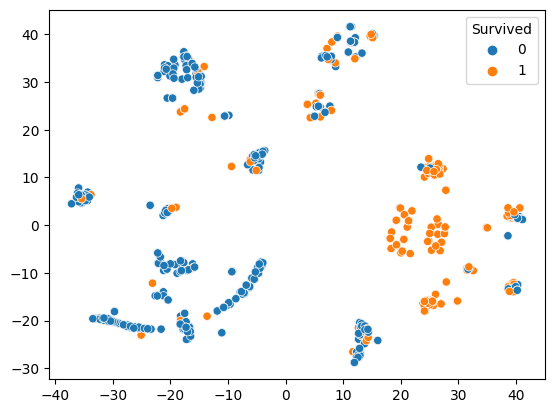

In [18]:
#TSNE畫圖確認
import seaborn as sns
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, n_jobs=-1)
data_tsne = tsne.fit_transform(x_scaled_np)

xs = data_tsne[:, 0]
ys = data_tsne[:, 1]
#hue帶入答案顏色
sns.scatterplot(x=xs,
        y=ys,
        hue=datas["Survived"])

In [19]:
#決策樹演算法
from sklearn.tree import DecisionTreeClassifier
#交叉驗證
from sklearn.model_selection import GridSearchCV

clf = DecisionTreeClassifier()
params = {
    "max_depth":range(3, 11)
}
#決策樹使用沒有scaling過的就可以
#放入演算法,測試幾層參數,使用所有資源運算,算幾次
cv = GridSearchCV(clf, params, n_jobs=-1, cv=10)
#測試資料用fit
cv.fit(x_np, y)
print(cv.best_score_)
print(cv.best_params_)

0.8294007490636706
{'max_depth': 4}


In [20]:
#隨機森林演算法
from sklearn.ensemble import RandomForestClassifier
#交叉驗證

from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()
params = {
    "max_depth":range(3, 11),
    "n_estimators":range(21, 150, 2)
}
#決策樹使用沒有scaling過的就可以
#放入演算法,測試幾層參數,使用所有資源運算,算幾次
cv = GridSearchCV(clf, params, n_jobs=-1, cv=10)
#測試資料用fit
cv.fit(x_np, y)
print(cv.best_score_)
print(cv.best_params_)

0.8451435705368289
{'max_depth': 7, 'n_estimators': 51}


In [21]:
#KNN演算法
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
params = {
    "n_neighbors":range(3, 40)
}

#放入演算法,測試幾層參數,使用所有資源運算,算幾次
cv = GridSearchCV(clf, params, n_jobs=-1, cv=10)
#測試資料用fit，距離要用scaling過的
cv.fit(x_scaled_np, y)
print(cv.best_score_)
print(cv.best_params_)

0.832796504369538
{'n_neighbors': 7}


In [22]:
#資料預測輸出答案
#算距離要scaling
clf = KNeighborsClassifier(n_neighbors=11)
clf.fit(x_scaled_np, y)
#predict預測答案
pre = clf.predict(x_prediet_scaled_np)
result = pd.DataFrame({
    "PassengerId":datas_predit["PassengerId"],
    "Survived":pre
})
result.to_csv("knn.csv", encoding="utf-8", index=False)

[Text(0.5, 0.875, 'Pclass_3 <= 0.5\ngini = 0.474\nsamples = 566\nvalue = [547, 344]\nclass = Victim'),
 Text(0.25, 0.625, 'Fare <= 13.25\ngini = 0.493\nsamples = 261\nvalue = [183, 234]\nclass = Survivor'),
 Text(0.125, 0.375, 'Name_Mr <= 0.5\ngini = 0.435\nsamples = 66\nvalue = [64, 30]\nclass = Victim'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Name_Mrs <= 0.5\ngini = 0.465\nsamples = 195\nvalue = [119, 204]\nclass = Survivor'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Name_Miss <= 0.5\ngini = 0.356\nsamples = 305\nvalue = [364, 110]\nclass = Victim'),
 Text(0.625, 0.375, 'Ticket <= 1.5\ngini = 0.278\nsamples = 244\nvalue = [319, 64]\nclass = Victim'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Fare <= 8.083\ngini = 0.5\nsamples = 61\nvalue = [45, 46]\nclass = Survivor'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text

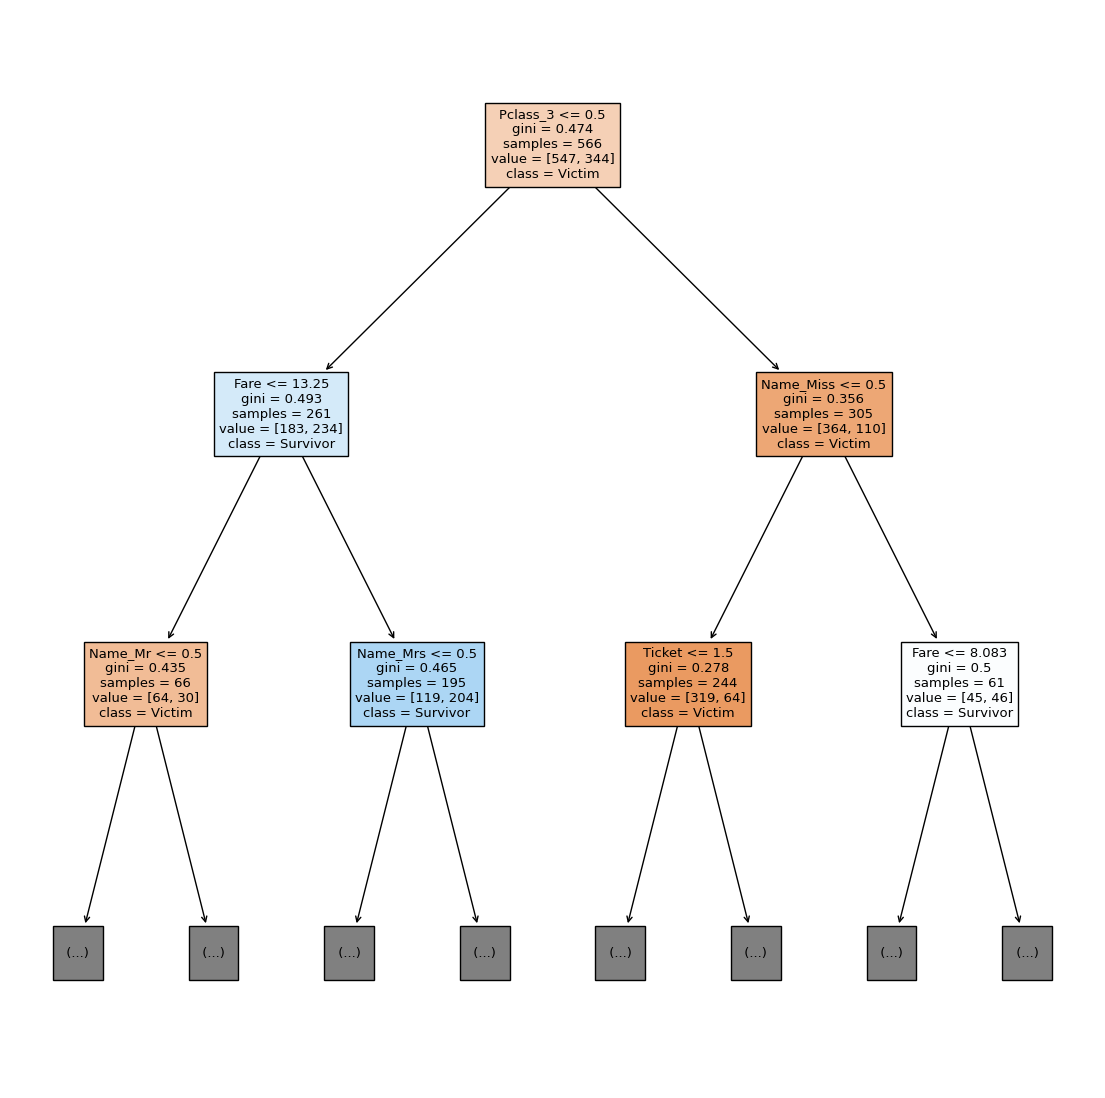

In [32]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
#可以把randomforest的決策樹畫出來
clf = RandomForestClassifier(max_depth=7, n_estimators=51)
clf.fit(x_np, y)
#畫第一棵
#clf.estimators_[0]

plt.figure(figsize=(14, 14))
plot_tree(clf.estimators_[2],
    feature_names=datas_total.columns,
    class_names=["Victim","Survivor"],
    filled = True,
    max_depth=2)

In [33]:
s = pd.Series(clf.feature_importances_, index=datas_total.columns)
s.sort_values(ascending=False)

Sex_female     0.152929
Sex_male       0.118409
Name_Mr        0.115451
Fare           0.104869
Age            0.082126
Pclass_3       0.069648
Family         0.049942
Name_Mrs       0.048052
Ticket         0.047107
Name_Miss      0.038343
Pclass_1       0.036312
SibSp          0.030907
Name_Master    0.016529
Parch          0.015804
Cabin_E        0.012642
Embarked_S     0.012286
Pclass_2       0.010306
Embarked_C     0.008988
Cabin_D        0.007219
Embarked_Q     0.006841
Cabin_C        0.005442
Cabin_B        0.004868
Cabin_A        0.002480
Cabin_G        0.001247
Cabin_F        0.001238
Cabin_T        0.000018
dtype: float64

In [23]:
#demo pandas filter
#帶入跟你資料筆數一樣的多的True False
#True留下 False抹消
# d = pd.DataFrame([
#     [0, 1],
#     [3, 4],
#     [5, 6]
# ])
# d[[True, False, True]]

In [24]:
#demo 取中間名
"Kelly, Mr. Brian".split(",")[-1].split(".")[0].strip()

'Mr'

In [25]:
#Demo:取列, iloc(看你具體是第幾列), loc(看你的列標籤)
t = pd.DataFrame([
    ["A", "B"],
    ["C", "D"]
], columns=["x", "y"], index=[1, 1])
t.iloc[1]

x    C
y    D
Name: 1, dtype: object